### Password - 1000k unique values for password collected online

    Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong..
    Strength of the password based on rules(such as containing digits, special symbols , etc.)

    The passwords used in the analysis are from 000webhost leak that is available online



# read data from SQL Database 

In [3]:
## importing all necessary libraries ..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\alkaa\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import sqlite3

In [6]:

con = sqlite3.connect(r'C:\Users\alkaa\Downloads\password_data.sqlite')

In [7]:

data = pd.read_sql_query("SELECT * FROM Users" , con)

In [8]:
data.shape

(100000, 3)

In [9]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


#  data cleaning 

In [10]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

### Removing irrelevant features 

In [11]:
data.drop(["index"] , axis=1 , inplace=True)

In [12]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


### Check duplicate rows

In [13]:
data.duplicated().sum()

0

### check missing values in columns 

In [14]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [15]:
data.isnull().any().sum() ## it means 0 feature have NAN values

0

### check data-types of every feature 

In [16]:
data.dtypes

password    object
strength     int64
dtype: object

### checking whether "strength" feature has irrelevant values or not 

In [17]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [18]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

# Performing Semantic Analysis 
    e.g ,,      
          
          a) How many password textual actually holds only numeric characters ?
          b) How many password textual actually holds only Upper-case character ? 
          
          c) How many password textual actually holds only alphabet ?
          d) How many password textual actually holds alpha-numeric character ? 
          e) How many password textual actually holds title-case character ? 
          
          f) How many password textual actually holds some special special character ? 
          
          

In [19]:
data.columns

Index(['password', 'strength'], dtype='object')

In [20]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [21]:
data["password"][0]

'zxe870819'

In [22]:
type(data["password"][0])

str

### a) How many password textual actually holds only numeric characters ?

In [23]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [24]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [25]:
data[data["password"].str.isnumeric()].shape  

(26, 2)

### b) How many password textual actually holds only Upper-case character ? 

In [26]:
data[data["password"].str.isupper()]


,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


### c) How many password textual actually holds only alphabet ? 

In [27]:
data[data["password"].str.isalpha()].shape


(50, 2)

### d) How many password textual actually holds alpha-numeric character ? 

In [28]:
data[data["password"].str.isalnum()]


,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


### e) How many password textual actually holds title-case character ? 

In [29]:
data[data["password"].str.istitle()]



,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


### f) How many password textual actually holds special character ? 

In [30]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [31]:
import string

In [32]:
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [34]:
data["password"].apply(find_semantics)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [35]:
data[data["password"].apply(find_semantics)==1]


,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


##  Applying Feature Engineering 




 ## Passwords depend on 5 factors :

       Length of password
       Frequency of Lowercase Characters
       Frequency of Uppercase Characters
       Frequency of Numeric Characters
       Frequency of Special Characters






#### length of every Password 

In [37]:
data["password"][0]

'zxe870819'

In [38]:
len(data["password"][0]) 

9

In [39]:
data["length"] = data["password"].str.len() 

#### Frequency of Lowercase Characters :

In [40]:
password = "Shan99"

In [41]:
[char for char in password if char.islower()]

['h', 'a', 'n']

In [42]:
len([char for char in password if char.islower()])

3

In [43]:
len([char for char in password if char.islower()])/len(password)

0.5

In [44]:
'''

Q..->> why we are diving each value by its Total length or why we are normalizing frequency ? 

Ans : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could 
also be high , so lets normalise it in the range between 0 to 1


'''

'\n\nQ..->> why we are diving each value by its Total length or why we are normalizing frequency ? \n\nAns : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could \nalso be high , so lets normalise it in the range between 0 to 1\n\n\n'

In [45]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

#### Frequency of Uppercase Characters :

In [46]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

#### Frequency of Numeric Characters :

In [47]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [48]:
### applying user-defined functions ..

In [49]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [50]:
data.head(3)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


#### Frequency of Special-case Characters :

In [51]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [52]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3) ## applying "freq_special_case" function

In [53]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [54]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] ## noromalising "special_char_freq" feature 

In [55]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


## Performing Descriptive Statistics 

In [56]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [57]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [58]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

### Higher the length, Higher the strength

    In case on alphabet frequency higher is not better. 
    Probably because it'll not be a strong password if max portion is occupied by just alphabets..
    Password has more strength if the char types are spread in decent proportions.





In [61]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

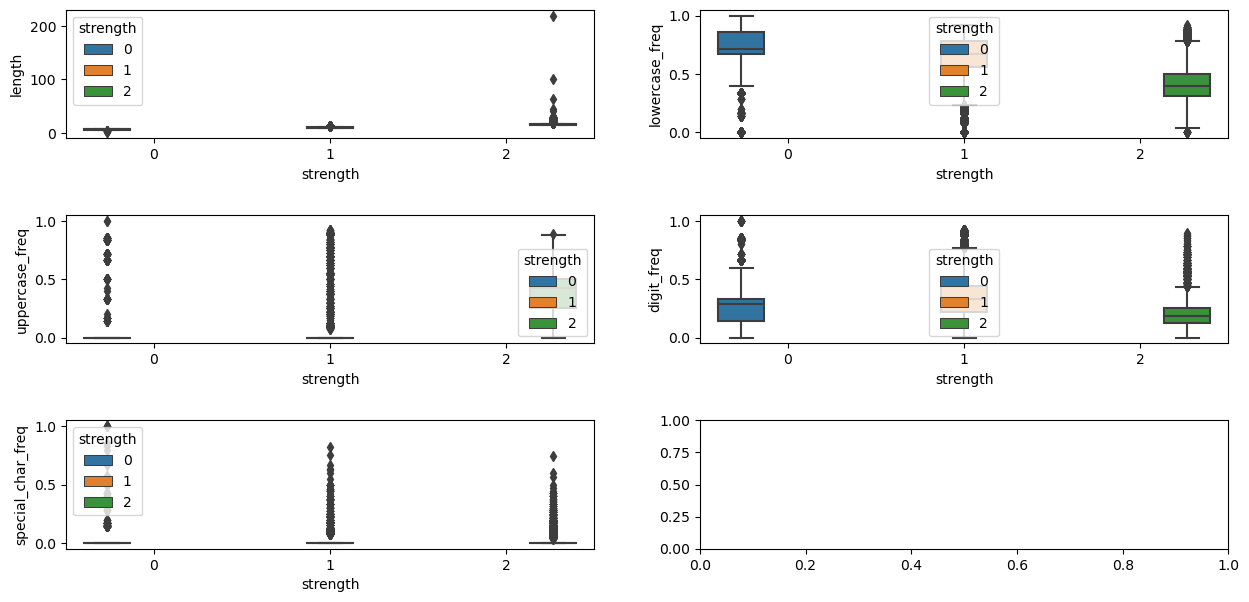

In [62]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

### Insights :
    Regarding the insights we can say that:-
  


->> Higher Lowercase frequency is seen in low strength passwords. 
    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2 
    but for 0 and 1 strength , there is overlap so no too much to say there. 
    But we can say a nicely propotioned password is good..
    
    
->> In upper_freq , there is a trend but not as strong as length or lower_freq..
    
    
->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.




##  Feature Importance 

In [64]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [65]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [66]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

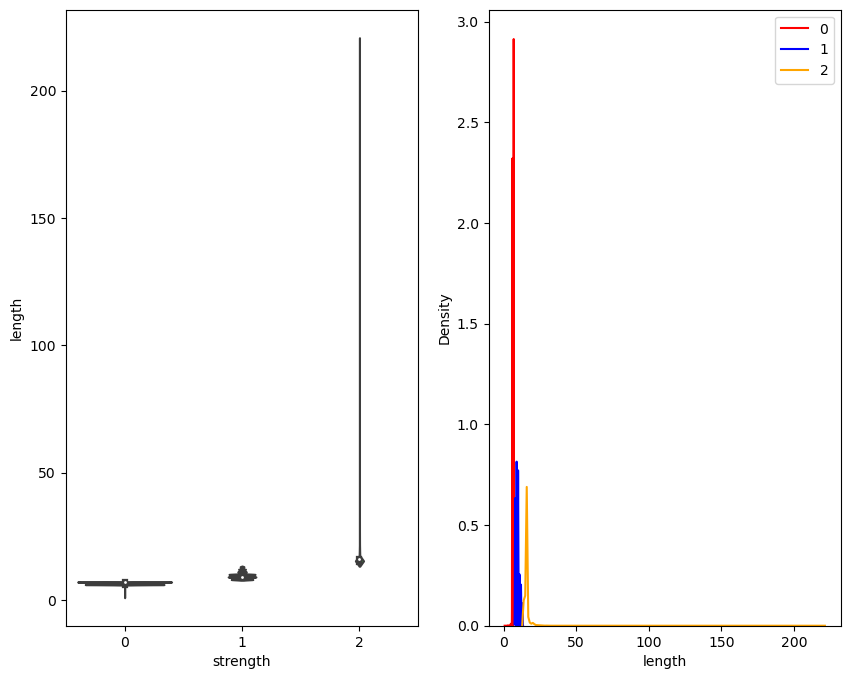

In [67]:
get_dist(data , "length")

In [69]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

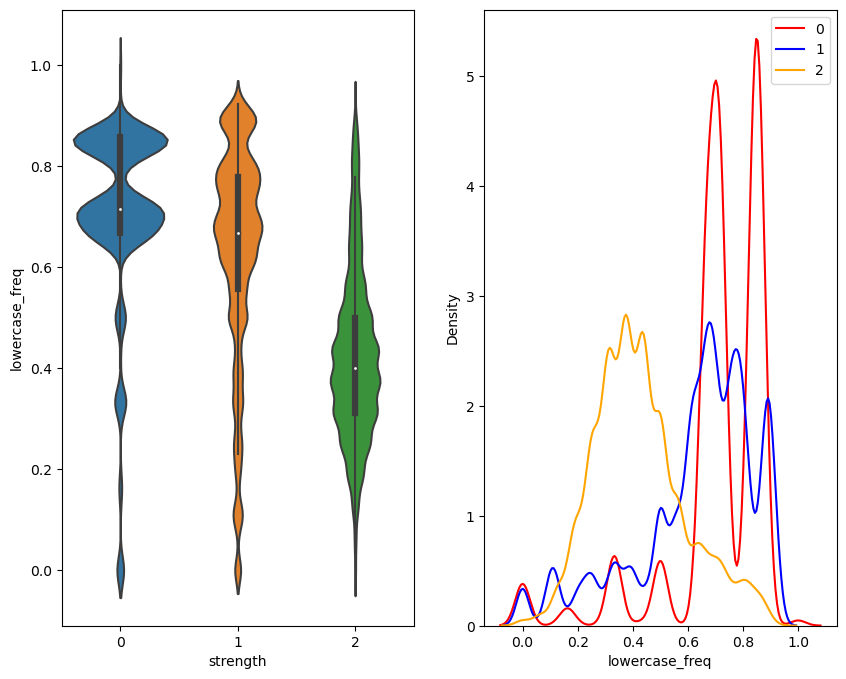

In [70]:
get_dist(data , 'lowercase_freq')

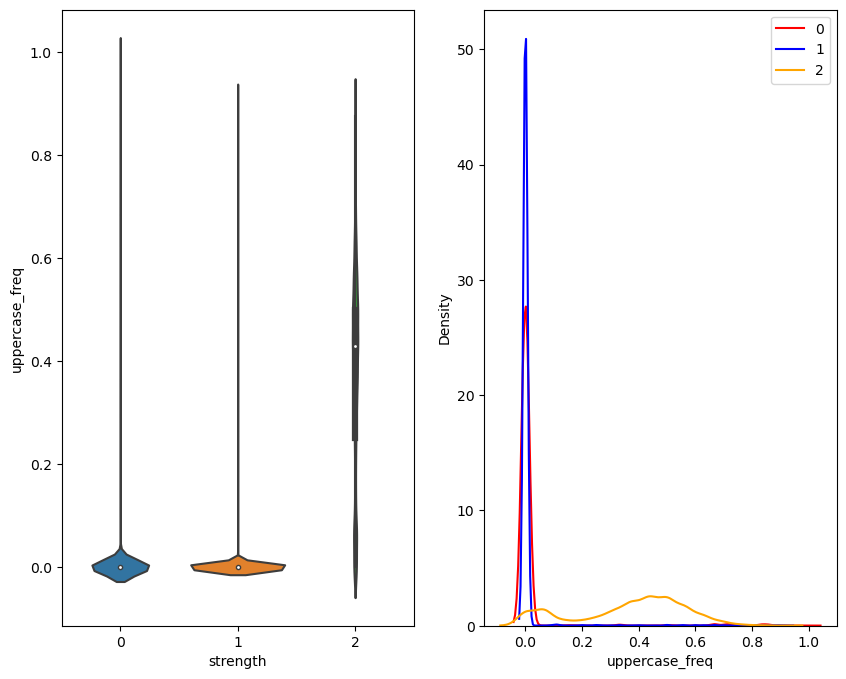

In [72]:
get_dist(data , 'uppercase_freq')

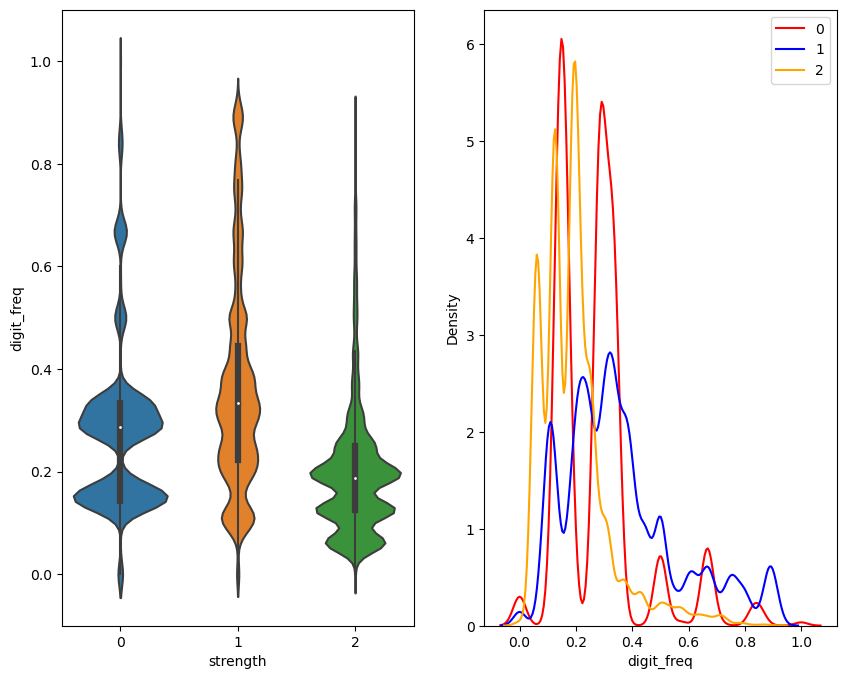

In [74]:
get_dist(data , 'digit_freq')

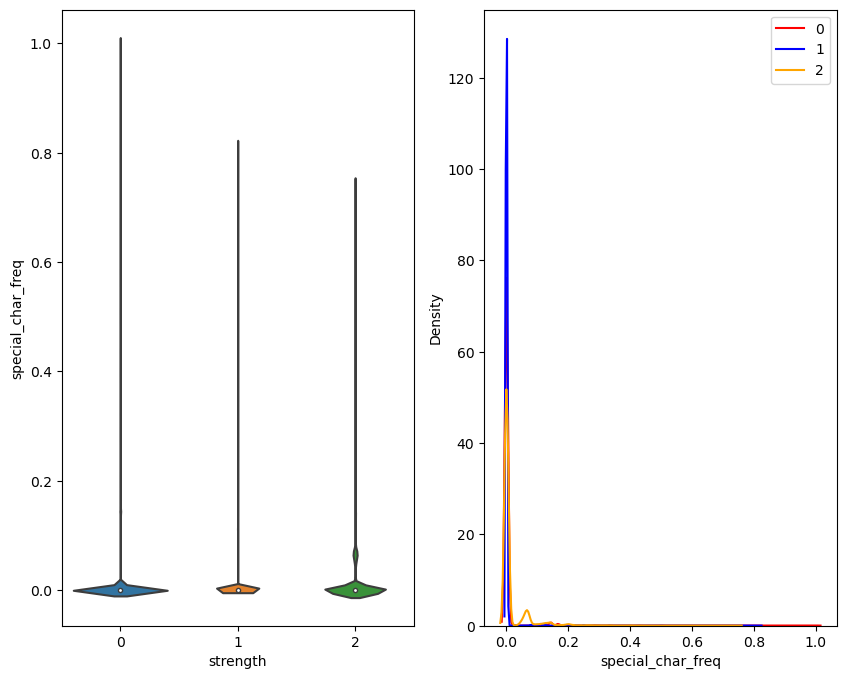

In [66]:
get_dist(data , 'special_char_freq')

### Key Insight : It ives us idea that length & lowercase freq are important features..





## 7.. Applying TF_IDF on data

In [67]:
data.head(4)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [68]:
data

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [70]:
dataframe = data.sample(frac=1) ### shuffling randomly for robustness of ML moodel 

In [71]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
1516,qq475963602,1,11,0.182,0.000,0.818,0.0
64007,molu16,0,6,0.667,0.000,0.333,0.0
36555,6b5t0huz,1,8,0.625,0.000,0.375,0.0
7202,sBPucizg2MwOYaxT,2,16,0.562,0.375,0.062,0.0
46949,kurtjna1,1,8,0.875,0.000,0.125,0.0
...,...,...,...,...,...,...,...
46697,sevtian117,1,10,0.700,0.000,0.300,0.0
1289,Kthproductions1234,2,18,0.722,0.056,0.222,0.0
73267,4FjlK0TI2NQTg725,2,16,0.188,0.438,0.375,0.0
19221,fg43450229,1,10,0.200,0.000,0.800,0.0


In [89]:
x = list(dataframe["password"])

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer ## import TF-IDF vectorizer to convert text data into numerical data

In [ ]:
#### as password is a series of chars , we have to calculate TF_IDF values of each char 
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we can compute Tf-Idf value of each character like Tf-IDF value of k , Tf-IDF value of z


In [84]:
vectorizer = TfidfVectorizer(analyzer="char")

In [90]:
X = vectorizer.fit_transform(x)

In [91]:
X.shape


## ie (100000,1) passwords gets represented using (100000, 99)
## ie each password gets represented using 99 dimensions ..



(100000, 99)

In [92]:
dataframe["password"].shape

(100000,)

In [93]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [94]:
X.toarray()  

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
X.toarray()[0] 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.21839161, 0.        , 0.19384265, 0.21710461, 0.23971391,
       0.24269376, 0.50858457, 0.25313426, 0.        , 0.23425394,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.61124673, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [96]:
dataframe["password"]

1516            qq475963602
64007                molu16
36555              6b5t0huz
7202       sBPucizg2MwOYaxT
46949              kurtjna1
                ...        
46697            sevtian117
1289     Kthproductions1234
73267      4FjlK0TI2NQTg725
19221            fg43450229
68622         wqlzyy7623020
Name: password, Length: 100000, dtype: object

In [98]:
len(vectorizer.get_feature_names_out())

99

In [99]:


vectorizer.get_feature_names_out()



array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [101]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [102]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Applying Machine Learning algorithm 

In [103]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [104]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [105]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [108]:
y = dataframe["strength"]

#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [106]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [110]:
X_train.shape

(80000, 101)

In [111]:
y_train.shape

(80000,)

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(multi_class="multinomial")

In [114]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [116]:
y_pred = clf.predict(X_test) ## doing prediction on X-Test data

In [117]:
y_pred

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [118]:
from collections import Counter

In [119]:
Counter(y_pred)

Counter({1: 16901, 2: 1575, 0: 1524})

### predicting sample data (user-entered input)

In [ ]:
### as Logistic reg. model'clf' was trained on 101 features [99 from TF-IDF + 2 features from (total_length+lower_case_freq)]
## hence we need to convert any input(password) into (1,101) so that the model will accept this as Input ..

In [120]:
password = "%@123abcd"

In [121]:
sample_array = np.array([password])

In [123]:
sample_matrix = vectorizer.transform(sample_array)

In [124]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [125]:
sample_matrix.toarray().shape

### right now , array dim. is (1,99) so now we need to make it as : (1,101) so that the model will accept it as input..
### need to add (length_of_password) & (total_lowercase_chars) in passsword

(1, 99)

In [126]:
password

'%@123abcd'

In [127]:
len(password)

9

In [128]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [130]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [132]:
np.append(sample_matrix.toarray() , (9,0.444)).shape

(101,)

In [133]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [134]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape

(1, 101)

In [135]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)

In [136]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [ ]:
### Automate it 

In [143]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [144]:
predict()

Enter a password : hnasfjafahy


'Password is normal'

### Model evaluation 

In [145]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [146]:
accuracy_score(y_test , y_pred)

0.79865

In [147]:
confusion_matrix(y_test , y_pred)

array([[  794,  1958,     0],
       [  654, 13865,   261],
       [   76,  1078,  1314]], dtype=int64)

### Report of the model

In [149]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.52      0.29      0.37      2752
           1       0.82      0.94      0.88     14780
           2       0.83      0.53      0.65      2468

    accuracy                           0.80     20000
   macro avg       0.73      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

